In [64]:
from sklearn.preprocessing import StandardScaler,LabelBinarizer, MultiLabelBinarizer
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt, matplotlib.font_manager as fm
import matplotlib

csv  = 'ks-projects-201801.csv'

#import csv and set index column to 'ID'
df = pd.read_csv(csv)
df['launched'] = pd.to_datetime(df['launched'], format='%Y-%m-%d %H:%M:%S')
df['deadline'] = pd.to_datetime(df['deadline'], format='%Y-%m-%d')
df.dtypes

df_raw=df.copy()
data = pd.read_csv(csv,index_col = 7,parse_dates=[5, 7])

#data.head()[:5]


data['usd_pledged'] = data['usd pledged']
data = data.drop('usd pledged', axis=1)
data.dtypes






ID                           int64
name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
pledged                    float64
state                       object
backers                      int64
country                     object
usd_pledged_real           float64
usd_goal_real              float64
usd_pledged                float64
dtype: object

In [77]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [65]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)
        
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

ID                  0.000000
backers             0.000000
category            0.000000
country             0.000000
currency            0.000000
deadline            0.000000
goal                0.000000
launched            0.000000
main_category       0.000000
name                0.000011
pledged             0.000000
state               0.000000
usd pledged         0.010027
usd_goal_real       0.000000
usd_pledged_real    0.000000
dtype: float64

In [3]:
df = pd.read_csv(csv, index_col = 'ID')
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
# determine number of rows and columns
#descriptive stats of numerical columns

df.shape
df.describe()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [5]:
# Taking a look at the first row of data
df.iloc[1]

name                Greeting From Earth: ZGAC Arts Capsule For ET
category                                           Narrative Film
main_category                                        Film & Video
currency                                                      USD
deadline                                               2017-11-01
goal                                                        30000
launched                                      2017-09-02 04:43:57
pledged                                                      2421
state                                                      failed
backers                                                        15
country                                                        US
usd pledged                                                   100
usd_pledged_real                                             2421
usd_goal_real                                               30000
Name: 1000003930, dtype: object

In [6]:
# check out the first 10 rows of Film & Video data

df[df['main_category'] == 'Film & Video'].head(10)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00
1000104688,Permaculture Skills,Webseries,Film & Video,CAD,2014-12-14,17757.0,2014-11-14 18:02:00,48905.00,successful,571,CA,43203.25,42174.03,15313.04
100011318,My Moon - Animated Short Film,Animation,Film & Video,USD,2017-05-03,50000.0,2017-04-03 17:11:33,57577.31,successful,840,US,10120.00,57577.31,50000.00
1000129669,Squatch Watchers,Webseries,Film & Video,USD,2013-08-23,10000.0,2013-07-24 21:40:13,1373.37,failed,54,US,1373.37,1373.37,10000.00
1000132945,Zen in America: a film on Zen Buddhism in Nort...,Documentary,Film & Video,USD,2013-10-21,10000.0,2013-09-21 23:00:54,15663.00,successful,213,US,15663.00,15663.00,10000.00
1000182258,WE ARE ONE: STREET MUSIC OF NEW ORLEANS,Documentary,Film & Video,USD,2013-10-01,2500.0,2013-08-27 20:17:27,0.00,failed,0,US,0.00,0.00,2500.00


In [7]:
# first 10 rows of Film & Video data that made more than $30,000

df[(df['main_category'] == 'Film & Video') & (df['pledged'] >= 30000)].head(10)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000104688,Permaculture Skills,Webseries,Film & Video,CAD,2014-12-14,17757.0,2014-11-14 18:02:00,48905.00,successful,571,CA,43203.25,42174.03,15313.04
100011318,My Moon - Animated Short Film,Animation,Film & Video,USD,2017-05-03,50000.0,2017-04-03 17:11:33,57577.31,successful,840,US,10120.00,57577.31,50000.00
1000201265,I'LL SEE YOU IN MY DREAMS - narrative feature ...,Narrative Film,Film & Video,USD,2014-02-05,60000.0,2014-01-11 00:57:14,61365.16,successful,632,US,61365.16,61365.16,60000.00
1001591110,Rocky Horror Saved My Life - A Fan Documentary,Documentary,Film & Video,USD,2013-11-01,50000.0,2013-09-02 02:06:49,66554.56,successful,665,US,66554.56,66554.56,50000.00
1003539829,Unconditional Hope - A Survivors Story.,Documentary,Film & Video,USD,2012-12-29,40000.0,2012-11-26 21:14:51,45155.00,successful,411,US,45155.00,45155.00,40000.00
100358406,Charlie vs Goliath,Documentary,Film & Video,USD,2016-09-02,40000.0,2016-08-03 21:54:32,40546.00,successful,267,US,25.00,40546.00,40000.00
1004405723,Golf Alpha Yankee: An LGBT Human Rights Docume...,Documentary,Film & Video,USD,2014-08-18,30000.0,2014-06-29 08:42:27,42060.63,successful,439,US,42060.63,42060.63,30000.00
1006567596,The Melody of Choice,Shorts,Film & Video,USD,2012-06-01,25000.0,2012-05-04 00:33:47,30255.00,successful,44,US,30255.00,30255.00,25000.00
1007805265,License to Operate,Documentary,Film & Video,USD,2013-10-04,50000.0,2013-09-04 20:44:12,50497.00,successful,97,US,50497.00,50497.00,50000.00


In [8]:
# Select Film & Video Pledge data then print out stats
film = df[(df['main_category'] == 'Film & Video') & (df['pledged'] )]
print('Maximum:' , film['pledged'].max())
print('Minimum:' , film['pledged'].min())
print('Mean:' , film['pledged'].mean())
print('Sum:' , film['pledged'].sum())
print('Count:' , film['pledged'].count())

Maximum: 5764229.38
Minimum: 1.0
Mean: 7478.961678898236
Sum: 404574432.02000004
Count: 54095


In [9]:
df['category'].unique()

array(['Poetry', 'Narrative Film', 'Music', 'Film & Video', 'Restaurants',
       'Food', 'Drinks', 'Product Design', 'Documentary', 'Nonfiction',
       'Indie Rock', 'Crafts', 'Games', 'Tabletop Games', 'Design',
       'Comic Books', 'Art Books', 'Fashion', 'Childrenswear', 'Theater',
       'Comics', 'DIY', 'Webseries', 'Animation', 'Food Trucks',
       'Public Art', 'Illustration', 'Photography', 'Pop', 'People', 'Art',
       'Family', 'Fiction', 'Accessories', 'Rock', 'Hardware', 'Software',
       'Weaving', 'Gadgets', 'Web', 'Jazz', 'Ready-to-wear', 'Festivals',
       'Video Games', 'Anthologies', 'Publishing', 'Shorts',
       'Electronic Music', 'Radio & Podcasts', 'Apps', 'Cookbooks',
       'Apparel', 'Metal', 'Comedy', 'Hip-Hop', 'Periodicals', 'Dance',
       'Technology', 'Painting', 'World Music', 'Photobooks', 'Drama',
       'Architecture', 'Young Adult', 'Latin', 'Mobile Games', 'Flight',
       'Fine Art', 'Action', 'Playing Cards', 'Makerspaces', 'Punk',
       

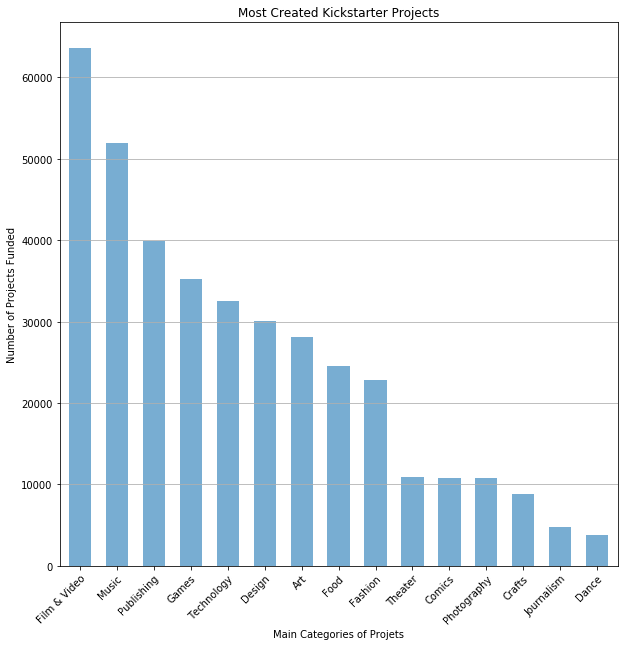

In [12]:
#Plot number of pojects by category
%matplotlib inline
count_data = df['main_category'].value_counts()
ax = count_data.plot(kind = 'bar', figsize = [10, 10], width=0.6, alpha=0.6, grid=False)
ax.set_xticklabels(count_data.index,rotation=45, rotation_mode='anchor', ha='right')
ax.yaxis.grid(True)
ax.set_title('Most Created Kickstarter Projects')
ax.set_xlabel('Main Categories of Projets')
ax.set_ylabel('Number of Projects Funded')
plt.show()

In [13]:
#detect outliers based on the descriptive stats

df['usd_pledged_real'].max()
df.usd_pledged_real.describe().apply(lambda x: format(x, 'f'))


count      378661.000000
mean         9058.924074
std         90973.343107
min             0.000000
25%            31.000000
50%           624.330000
75%          4050.000000
max      20338986.270000
Name: usd_pledged_real, dtype: object

In [14]:
within_std = df[(df['usd_pledged_real'] <=100031) & (df['usd_pledged_real'] >=1)]

In [16]:
s_f = df['state'].astype('category')
s_f.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [17]:
#state of campaigns 
s_f = df['state'] 
totals = s_f.value_counts()
totals

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [18]:
#countries of backers
df['backers'].groupby(df['country']).count()

country
AT         597
AU        7839
BE         617
CA       14756
CH         761
DE        4171
DK        1113
ES        2276
FR        2939
GB       33672
HK         618
IE         811
IT        2878
JP          40
LU          62
MX        1752
N,0"      3797
NL        2868
NO         708
NZ        1447
SE        1757
SG         555
US      292627
Name: backers, dtype: int64

In [19]:
view = df['currency'] == 'GBP'
df[view]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,94175.00,successful,761,GB,57763.78,121857.33,6469.73
1000103948,Superhero Teddy Bear,DIY,Crafts,GBP,2016-01-05,12000.0,2015-12-06 20:09:06,0.00,failed,0,GB,0.00,0.00,17489.65
1000104953,Rebel Army Origins: The Heroic Story Of Major ...,Comics,Comics,GBP,2016-01-28,100.0,2015-12-29 16:59:29,112.38,successful,27,GB,167.70,160.60,142.91
1000115172,Daily Brew Coffee,Food Trucks,Food,GBP,2015-03-31,3500.0,2015-03-01 18:06:32,21.00,failed,1,GB,32.42,31.09,5181.12
1000256230,Shreddit - Privacy on Reddit,Software,Technology,GBP,2017-07-02,2000.0,2017-06-02 12:20:21,0.00,failed,0,GB,0.00,0.00,2579.35
1000257563,"""Flying"" Carpets from Azerbaijan, Iran and Tur...",Weaving,Crafts,GBP,2015-04-29,5000.0,2015-03-30 19:55:31,2.00,failed,1,GB,2.98,3.09,7716.41
1000291122,VOTE (anyone but) TRUMP Candle,Product Design,Design,GBP,2016-08-24,500.0,2016-07-12 17:31:42,218.00,failed,6,GB,174.83,288.03,660.62
1000328328,ANVIL Beard,Fashion,Fashion,GBP,2015-02-06,2000.0,2014-12-15 19:13:37,61.00,failed,9,GB,95.87,93.44,3063.58


In [20]:
# difference between the amount pledged overall and the amount pledged in USS
first_hundred = df[:100]

first_hundred['diff'] = first_hundred['usd_pledged_real'] - first_hundred['usd pledged']

test = first_hundred[first_hundred['diff'] >=1]

test[first_hundred['country'] == 'US']

/home/christina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/christina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,diff
ID,,,,,,,,,,,,,,,
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.0,2421.00,30000.0,2321.00
100011318,My Moon - Animated Short Film,Animation,Film & Video,USD,2017-05-03,50000.0,2017-04-03 17:11:33,57577.31,successful,840,US,10120.0,57577.31,50000.0,47457.31
1000117861,Ledr workbook: one tough journal!,Product Design,Design,USD,2016-10-08,1000.0,2016-09-07 13:14:26,47266.00,successful,549,US,11253.0,47266.00,1000.0,36013.00
1000153208,Phil Younger - Slow Down (Official Music Video),Music,Music,USD,2016-12-20,2100.0,2016-12-09 20:27:02,2100.00,successful,34,US,83.0,2100.00,2100.0,2017.00
1000170964,Penny Bingo Playing Card Game fun for the whol...,Tabletop Games,Games,USD,2017-03-27,1500.0,2017-03-02 04:01:43,856.00,failed,25,US,324.0,856.00,1500.0,532.00
100020143,H2O The Underwater Portraits,People,Photography,USD,2017-10-30,9500.0,2017-09-25 17:17:43,6.00,failed,2,US,5.0,6.00,9500.0,1.00
1000261018,Diposta - liberating people from their postal ...,Web,Technology,USD,2016-08-23,100000.0,2016-07-24 13:18:36,141.00,failed,3,US,100.0,141.00,100000.0,41.00


In [21]:
#difference between amount pledged and the amount pledge in USD


df['diff'] = df['usd_pledged_real'] - df['usd pledged']

test2 = df[df['diff'] >=1]

# selecting on the US and successful kickstarters here
usd_pledged_in_us = test2[df['country'] == 'US']

usd_pledged_in_us[usd_pledged_in_us['state'] == 'successful']

/home/christina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,diff
ID,,,,,,,,,,,,,,,
100011318,My Moon - Animated Short Film,Animation,Film & Video,USD,2017-05-03,50000.0,2017-04-03 17:11:33,57577.31,successful,840,US,10120.00,57577.31,50000.0,47457.31
1000117861,Ledr workbook: one tough journal!,Product Design,Design,USD,2016-10-08,1000.0,2016-09-07 13:14:26,47266.00,successful,549,US,11253.00,47266.00,1000.0,36013.00
1000153208,Phil Younger - Slow Down (Official Music Video),Music,Music,USD,2016-12-20,2100.0,2016-12-09 20:27:02,2100.00,successful,34,US,83.00,2100.00,2100.0,2017.00
1000415969,Disaster Area: A Podcast,Radio & Podcasts,Publishing,USD,2016-12-28,1000.0,2016-11-28 17:58:04,1055.00,successful,19,US,0.00,1055.00,1000.0,1055.00
1000490852,Carriage,Art,Art,USD,2017-12-24,8000.0,2017-11-24 18:06:35,8360.00,successful,121,US,605.00,8360.00,8000.0,7755.00
100056789,Four Short Stories and Ten Love Poems,Publishing,Publishing,USD,2017-08-25,3000.0,2017-07-11 17:43:09,3165.00,successful,33,US,225.00,3165.00,3000.0,2940.00
100065084,One Man's Opinion Of Moonlight Song Collection,Music,Music,USD,2017-06-29,1450.0,2017-06-14 19:57:18,1647.00,successful,33,US,0.00,1647.00,1450.0,1647.00
1000710630,Our Shared Stories: An Afghan Diary,Anthologies,Publishing,USD,2016-08-20,7500.0,2016-07-06 16:22:04,9500.00,successful,86,US,880.00,9500.00,7500.0,8620.00
1000758916,Keys to the Moon's First Full Length Album!,Music,Music,USD,2016-10-01,4000.0,2016-09-01 15:32:07,4629.00,successful,37,US,15.00,4629.00,4000.0,4614.00


In [22]:
# Calculate the percent difference and add the column to the dataframe. 

df['diff'] = (df['usd_pledged_real'] / df['usd pledged']  ) * 100
test = df[df['diff']  < 100]

usd_pledged_in_us = test[df['country'] == 'US']

usd_pledged_in_us[usd_pledged_in_us['state'] == 'successful']

/home/christina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,diff
ID,,,,,,,,,,,,,,,
101109496,Shonen Boys Enamel Pins!,Graphic Design,Design,USD,2017-11-23,650.0,2017-11-02 19:42:50,1852.00,successful,45,US,2014.00,1852.00,650.0,91.956306
1056242159,Custom Graffiti Art.,Painting,Art,USD,2017-08-08,40.0,2017-07-09 23:03:48,201.00,successful,4,US,215.00,201.00,40.0,93.488372
1070305978,20 Oldschool and Vintage Poster Prints.,Graphic Design,Design,USD,2016-10-28,1.0,2016-09-28 23:12:42,40.00,successful,2,US,60.00,40.00,1.0,66.666667
1098736561,Laughing Phoenix,Film & Video,Film & Video,USD,2017-08-17,1.0,2017-06-18 01:43:33,14.00,successful,6,US,15.00,14.00,1.0,93.333333
1100409267,Anime Neon Genesis Evangelion X Sailor Moon En...,Art,Art,USD,2017-12-05,1150.0,2017-11-05 01:50:14,1554.00,successful,36,US,1614.00,1554.00,1150.0,96.282528
1151038881,"""Manor of Madness"" Soundscapes by Darkraven Eu...",Tabletop Games,Games,USD,2016-07-13,1000.0,2016-06-26 18:19:23,2282.00,successful,67,US,2339.00,2282.00,1000.0,97.563061
1192467196,The Essential Case | An 11Collection Leather D...,Design,Design,USD,2016-09-21,2500.0,2016-08-23 16:21:51,2525.00,successful,13,US,3113.00,2525.00,2500.0,81.111468
1293883635,Mini-Tree Glow Sculptures! Hand Crafted Art fr...,Design,Design,USD,2016-12-02,300.0,2016-11-11 02:02:08,300.00,successful,4,US,306.00,300.00,300.0,98.039216
1335823212,PANL1 Speaker System By VETR Audio | Ditch The...,Sound,Technology,USD,2017-04-12,10000.0,2017-03-14 17:02:54,10239.00,successful,33,US,12284.00,10239.00,10000.0,83.352328


In [24]:
#All successful kickstarters in the USA

us = df['country'] == 'US'  
success = df['state'] == 'successful'

df[us & success]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,diff
ID,,,,,,,,,,,,,,,
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.0,100.000000
1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.0,100.000000
100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,successful,100,US,12700.00,12700.00,12500.0,100.000000
1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17,250.0,2012-08-02 14:11:32,250.00,successful,7,US,250.00,250.00,250.0,100.000000
1000072011,CMUK. Shoes: Take on Life Feet First.,Fashion,Fashion,USD,2013-12-30,20000.0,2013-11-25 07:06:11,34268.00,successful,624,US,34268.00,34268.00,20000.0,100.000000
1000091520,The Book Zoo - A Mini-Comic,Comics,Comics,USD,2014-11-12,175.0,2014-10-23 17:15:50,701.66,successful,66,US,701.66,701.66,175.0,100.000000
1000102741,Matt Cavenaugh & Jenny Powers make their 1st a...,Music,Music,USD,2011-01-06,10000.0,2010-12-07 23:16:50,15827.00,successful,147,US,15827.00,15827.00,10000.0,100.000000
100011318,My Moon - Animated Short Film,Animation,Film & Video,USD,2017-05-03,50000.0,2017-04-03 17:11:33,57577.31,successful,840,US,10120.00,57577.31,50000.0,568.945751
1000117861,Ledr workbook: one tough journal!,Product Design,Design,USD,2016-10-08,1000.0,2016-09-07 13:14:26,47266.00,successful,549,US,11253.00,47266.00,1000.0,420.030214


In [25]:
#df['launched'].groupby(pd.TimeGrouper(freq='M')).sum())

In [49]:
# The total sum pledged by category
sum_by_categories = pd.DataFrame(df.groupby(['main_category'])['pledged'].sum().sort_values().reset_index())


In [50]:
sum_by_categories

,main_category,pledged
0,Dance,1.390693e+07
1,Journalism,1.530200e+07
2,Crafts,1.776030e+07
3,Photography,3.950123e+07
4,Theater,4.471301e+07
5,Comics,7.464365e+07
6,Art,1.015470e+08
7,Food,1.313787e+08
8,Publishing,1.450902e+08
9,Fashion,1.494227e+08


([<matplotlib.patches.Wedge at 0x7effafd62400>,
 [Text(1.09992,0.013107,'Dance'),
  Text(1.09925,0.0406276,'Journalism'),
  Text(1.09766,0.0717472,'Crafts'),
  Text(1.09282,0.125494,'Photography'),
  Text(1.08093,0.203953,'Theater'),
  Text(1.05446,0.313238,'Comics'),
  Text(0.995357,0.468257,'Art'),
  Text(0.882767,0.656295,'Food'),
  Text(0.704098,0.845131,'Publishing'),
  Text(0.470791,0.994161,'Fashion'),
  Text(0.149822,1.08975,'Music'),
  Text(-0.415801,1.01839,'Film & Video'),
  Text(-1.07669,0.225245,'Technology'),
  Text(-0.514483,-0.972269,'Games'),
  Text(0.842226,-0.70757,'Design')],
 [Text(0.599957,0.00714928,'0.4%'),
  Text(0.599591,0.0221605,'0.4%'),
  Text(0.598722,0.0391348,'0.5%'),
  Text(0.596083,0.068451,'1.1%'),
  Text(0.589597,0.111247,'1.2%'),
  Text(0.575159,0.170857,'2.0%'),
  Text(0.542922,0.255413,'2.8%'),
  Text(0.481509,0.357979,'3.6%'),
  Text(0.384054,0.46098,'4.0%'),
  Text(0.256795,0.54227,'4.1%'),
  Text(0.0817209,0.594409,'5.7%'),
  Text(-0.226801,0.5

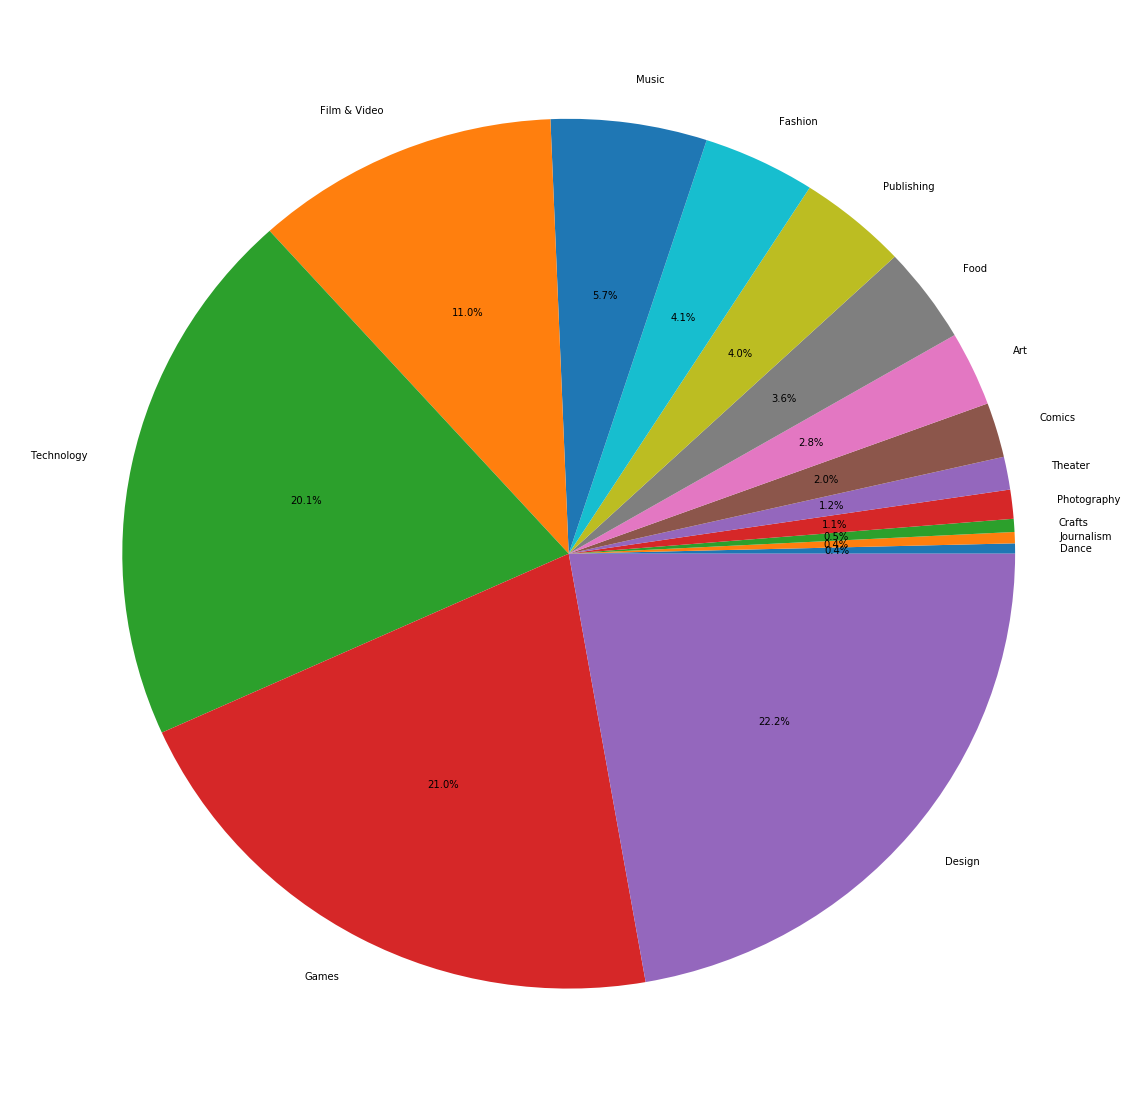

In [51]:
plt.pie(sum_by_categories['pledged'], labels=sum_by_categories['main_category'], autopct='%1.1f%%')

In [53]:
# The total sum pledged by category
sum_of_backers_by_categories = pd.DataFrame(df.groupby(['main_category'])['backers'].max().sort_values().reset_index())

([<matplotlib.patches.Wedge at 0x7effaf35dbe0>,
 [Text(1.0999,0.015183,'Journalism'),
  Text(1.09894,0.0483722,'Theater'),
  Text(1.09661,0.0863303,'Dance'),
  Text(1.09191,0.133129,'Photography'),
  Text(1.07767,0.220492,'Crafts'),
  Text(1.04572,0.341286,'Food'),
  Text(0.995691,0.467547,'Comics'),
  Text(0.925253,0.594902,'Fashion'),
  Text(0.816758,0.736822,'Publishing'),
  Text(0.657191,0.8821,'Art'),
  Text(0.458843,0.999732,'Music'),
  Text(-0.0904856,1.09627,'Film & Video'),
  Text(-0.895652,0.638598,'Technology'),
  Text(-0.94995,-0.554613,'Design'),
  Text(0.625801,-0.90464,'Games')],
 [Text(0.599943,0.00828166,'0.4%'),
  Text(0.59942,0.0263848,'0.5%'),
  Text(0.598149,0.0470893,'0.6%'),
  Text(0.59559,0.0726158,'0.8%'),
  Text(0.587823,0.120268,'1.8%'),
  Text(0.570391,0.186156,'1.8%'),
  Text(0.543104,0.255025,'2.1%'),
  Text(0.504683,0.324492,'2.1%'),
  Text(0.445504,0.401903,'3.1%'),
  Text(0.358468,0.481145,'3.2%'),
  Text(0.250278,0.545308,'3.5%'),
  Text(-0.0493558,0.5

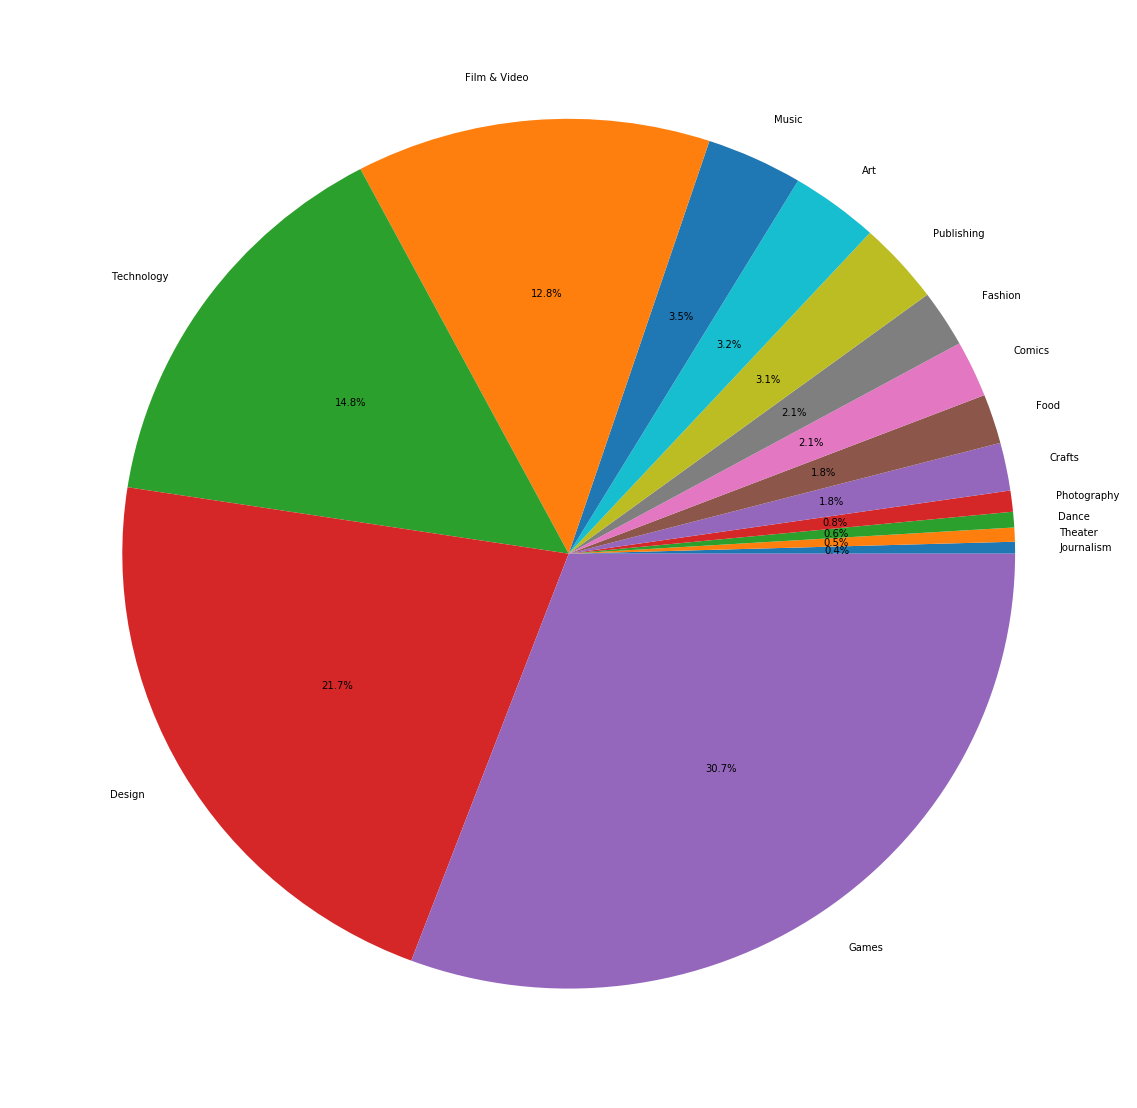

In [55]:
plt.pie(sum_of_backers_by_categories['backers'], labels=sum_of_backers_by_categories['main_category'], autopct='%1.1f%%')

In [29]:

#select observations between two dates
df[(df['launched']> '2017-1-1 00:00:00') & (df['launched']<= '2017-2-1 00:00:00')]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,diff
ID,,,,,,,,,,,,,,,
1000149007,Unschooling To University Book Project,Nonfiction,Publishing,CAD,2018-01-19,3000.0,2017-11-20 18:15:14,592.0,live,24,CA,185.65,472.88,2396.36,2.547159e+02
1000348690,The Silence of Hollowind - Urban Fantasy RPG,Tabletop Games,Games,EUR,2017-11-23,5000.0,2017-10-24 16:58:01,11238.0,successful,346,IT,5509.51,13347.43,5938.52,2.422617e+02
1000490852,Carriage,Art,Art,USD,2017-12-24,8000.0,2017-11-24 18:06:35,8360.0,successful,121,US,605.00,8360.00,8000.00,1.381818e+03
1000598804,Gone In 61 Seconds,Tabletop Games,Games,USD,2017-11-08,1000.0,2017-11-03 13:44:35,875.0,failed,14,US,420.00,875.00,1000.00,2.083333e+02
1000654409,Echo-Fuel: Make Echo Portable with Universal C...,Hardware,Technology,USD,2017-12-07,50000.0,2017-11-04 19:46:50,4237.0,failed,12,US,4384.00,4237.00,50000.00,9.664690e+01
1000761521,KILOS.,Thrillers,Film & Video,USD,2018-02-06,5000.0,2017-12-23 20:34:31,310.0,live,4,US,200.00,310.00,5000.00,1.550000e+02
1000916036,Conference Paradigm Shift Meeting #3,Performance Art,Art,EUR,2017-12-13,700.0,2017-10-14 08:25:55,85.0,failed,4,FR,88.86,100.35,826.42,1.129305e+02
1001407622,Quadrato Retractable Knife - Make 100,Product Design,Design,USD,2017-11-21,5350.0,2017-11-07 22:41:41,2670.0,failed,35,US,753.00,2670.00,5350.00,3.545817e+02
1001664105,Colors Do-it-Yourself Art Party,Art,Art,USD,2017-11-06,500.0,2017-10-16 19:27:29,0.0,failed,0,US,0.00,0.00,500.00,NaN


In [56]:
# find the amount pledged by date range
month = pd.date_range('1/1/2013', periods=12, freq='M')
data.pledged.resample('1M', label='right').sum()[:10]

launched
1970-01-31    0.0
1970-02-28    NaN
1970-03-31    NaN
1970-04-30    NaN
1970-05-31    NaN
1970-06-30    NaN
1970-07-31    NaN
1970-08-31    NaN
1970-09-30    NaN
1970-10-31    NaN
Freq: M, Name: pledged, dtype: float64

In [57]:
#Check for a specific launched date range
data.loc['1970-01-01':'1971-12-01']

,ID,name,category,main_category,currency,deadline,goal,pledged,state,backers,country,usd_pledged_real,usd_goal_real,usd_pledged
launched,,,,,,,,,,,,,,
1970-01-01 01:00:00,1014746686,Salt of the Earth: A Dead Sea Movie (Canceled),Film & Video,Film & Video,USD,2010-09-15,5000.0,0.0,canceled,0,US,0.0,5000.00,0.0
1970-01-01 01:00:00,1245461087,1st Super-Size Painting - Social Network Owned...,Art,Art,USD,2010-08-14,15000.0,0.0,canceled,0,US,0.0,15000.00,0.0
1970-01-01 01:00:00,1384087152,"""ICHOR"" (Canceled)",Film & Video,Film & Video,USD,2010-05-21,700.0,0.0,canceled,0,US,0.0,700.00,0.0
1970-01-01 01:00:00,1480763647,"Support Solo Theater! Help ""Ungrateful Daughte...",Theater,Theater,USD,2010-06-01,4000.0,0.0,canceled,0,US,0.0,4000.00,0.0
1970-01-01 01:00:00,330942060,"Help RIZ Make A Charity Album: 8 Songs, 8 Caus...",Music,Music,USD,2010-05-04,10000.0,0.0,canceled,0,US,0.0,10000.00,0.0
1970-01-01 01:00:00,462917959,Identity Communications Infographic (Canceled),Design,Design,USD,2010-04-10,500.0,0.0,canceled,0,US,0.0,500.00,0.0
1970-01-01 01:00:00,69489148,Student Auditions Music 2015,Publishing,Publishing,CHF,2015-10-31,1900.0,0.0,suspended,0,CH,0.0,1905.97,0.0


In [59]:
#Total amount pledged at the end of the month in 2013
data.pledged.loc['2013-01-01':'2013-12-01'].resample('1M').sum()

launched
2013-01-31    26407390.83
2013-02-28    33465088.65
2013-03-31    51427050.98
2013-04-30    43270878.64
2013-05-31    45511130.71
2013-06-30    38072874.77
2013-07-31    40058758.26
2013-08-31    32053416.57
2013-09-30    41715517.30
2013-10-31    46975766.33
2013-11-30    42624883.07
2013-12-31      164028.25
Freq: M, Name: pledged, dtype: float64

In [60]:
# Find the mean given by month from 2013 - 2017
data.pledged.loc['2017-01-01':'2017-12-01'].resample('1M').mean()


launched
2017-01-31    11140.479744
2017-02-28    14004.532414
2017-03-31    16324.843996
2017-04-30    15133.361901
2017-05-31    16395.339242
2017-06-30    14283.702127
2017-07-31    15489.364103
2017-08-31    15464.709956
2017-09-30    19583.859532
2017-10-31    16711.685311
2017-11-30    14440.060180
2017-12-31    15899.411975
Freq: M, Name: pledged, dtype: float64

In [69]:
# Find the mean given by day of the week
data.drop(['ID'], axis=1).groupby(data.index.weekday_name).mean()

,goal,pledged,backers,usd_pledged_real,usd_goal_real,usd_pledged
launched,,,,,,
Friday,53717.163486,6521.533525,74.493511,6067.484755,50181.777385,5144.518022
Monday,49822.228429,9775.790072,111.396404,9363.809165,47722.253572,7344.969056
Saturday,40500.873062,5188.089776,59.824770,4821.584459,35875.890425,4033.604019
Sunday,36393.933406,6115.433546,66.397948,5739.084866,33697.778736,4926.138860
Thursday,52186.374223,8168.695734,90.834692,7501.621073,48155.449527,5914.791249
Tuesday,53343.862236,15198.273071,157.648609,14255.440673,49318.027554,10416.908917
Wednesday,44842.360931,10665.404042,115.383997,9903.587567,40766.922396,7635.423267


In [70]:
#remove data from 1970
rm_data = data.loc['2008-12-01': '2018-01-31']


In [71]:
rm_data.describe()


,ID,goal,pledged,backers,usd_pledged_real,usd_goal_real,usd_pledged
count,3.786540e+05,3.786540e+05,3.786540e+05,378654.000000,3.786540e+05,3.786540e+05,3.748570e+05
mean,1.074735e+09,4.908160e+04,9.683158e+03,105.619428,9.059092e+03,4.545514e+04,7.036860e+03
std,6.190872e+08,1.183402e+06,9.563688e+04,907.193306,9.097418e+04,1.152961e+06,7.864047e+04
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,1.000000e-02,0.000000e+00
25%,5.382696e+08,2.000000e+03,3.000000e+01,2.000000,3.100000e+01,2.000000e+03,1.698000e+01
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,6.244650e+02,5.500000e+03,3.947900e+02
75%,1.610155e+09,1.600000e+04,4.076000e+03,56.000000,4.050000e+03,1.550000e+04,3.034620e+03
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,1.663614e+08,2.033899e+07


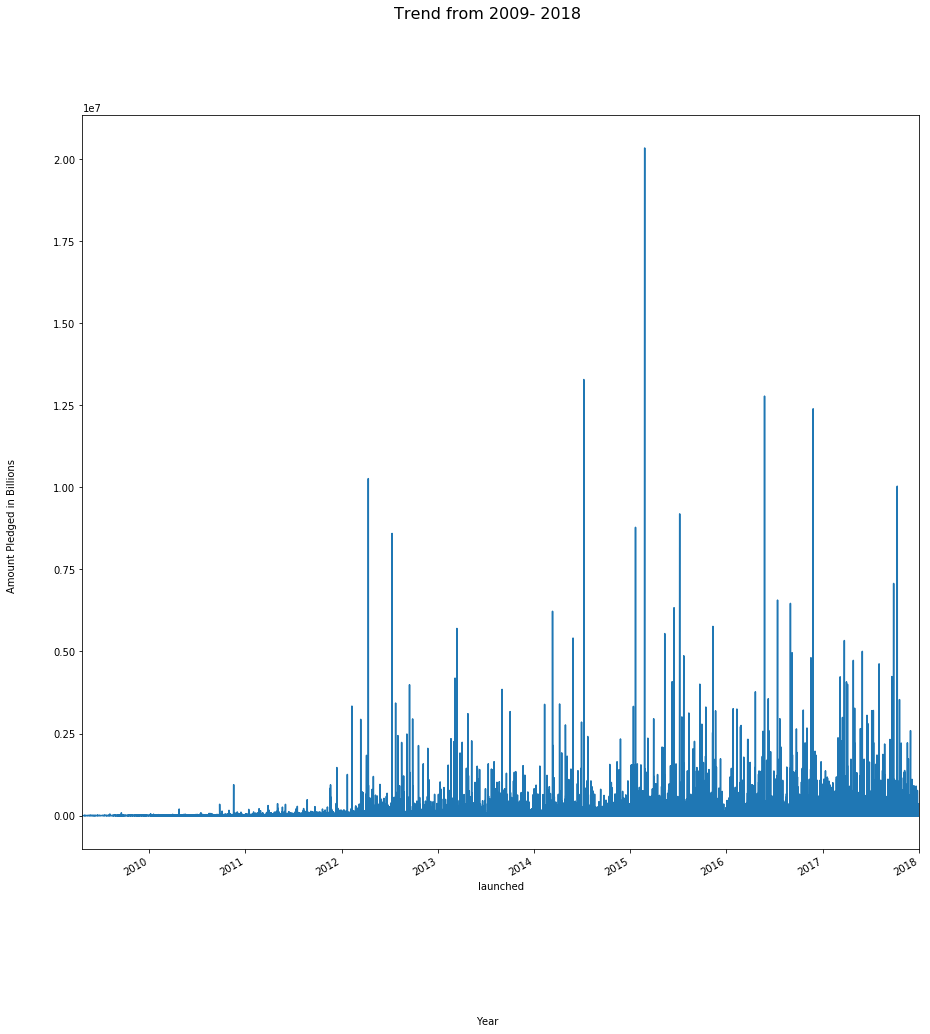

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
x = rm_data.index  #loc['2013-01-01':'2013-12-01'].resample('1D')
y = rm_data.pledged #.loc['2013-01-01':'2013-12-01'].resample('1D').mean()


fig, ax = plt.subplots( figsize = (15,15))
fig.suptitle('Trend from 2009- 2018', fontsize=16)
fig.text(0.5, 0.04, 'Year', ha='center', va='center')
fig.text(0.06, 0.5, 'Amount Pledged in Billions', ha='center', va='center', rotation='vertical')
rm_data.pledged.plot(ax=ax)
plt.show()




Text(0,0.5,'Mean amount raised over year')

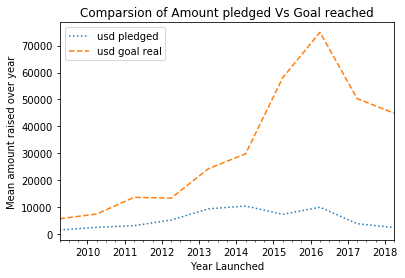

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

#Resample the mean pledged every 12 months
rm_data.usd_pledged.resample('12M').mean().plot( style=':')
rm_data.usd_goal_real.resample('12M').mean().plot( style='--')
plt.legend(['usd pledged', 'usd goal real'], loc ='upper left')
plt.title('Comparsion of Amount pledged Vs Goal reached')
plt.xlabel('Year Launched')
plt.ylabel('Mean amount raised over year')

Text(0,0.5,'Mean amount raised over year')

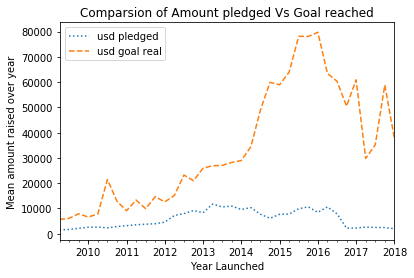

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
#Resample the mean pledged every 3 months
rm_data.usd_pledged.resample('3M').mean().plot( style=':')
rm_data.usd_goal_real.resample('3M').mean().plot( style='--')
plt.legend(['usd pledged', 'usd goal real'], loc ='upper left')
plt.title('Comparsion of Amount pledged Vs Goal reached')
plt.xlabel('Year Launched')
plt.ylabel('Mean amount raised over year')

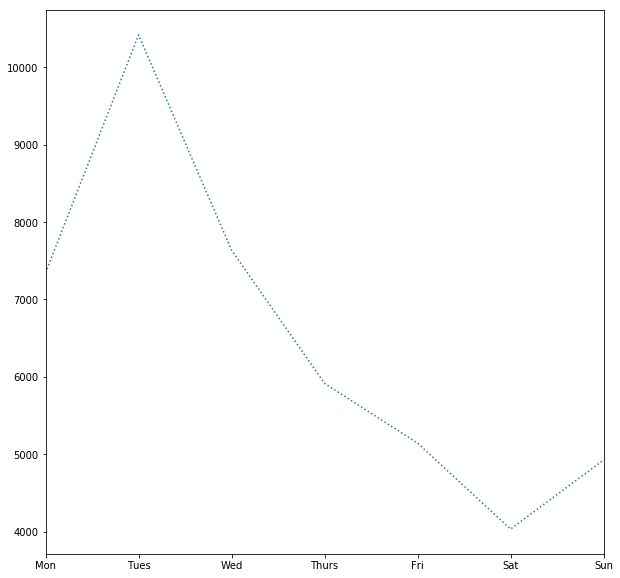

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))

wd =  rm_data.usd_pledged.groupby(rm_data.index.dayofweek).mean()
wd = rm_data.usd_pledged.groupby(rm_data.index.dayofweek).mean()

wd.index =['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

wd.plot(style=':')
#wd.loc['2015-01-01':'2015-12-01'].plot(style='--')